In [2]:
using PyCall

In [3]:
pg = pyimport("pygimli")

PyObject <module 'pygimli' from 'C:\\Users\\halbm\\AppData\\Roaming\\Python\\Python37\\site-packages\\pygimli-1.1.0+2.g6890f54c-py3.7.egg\\pygimli\\__init__.py'>

In [4]:
np = pyimport("numpy")

PyObject <module 'numpy' from 'C:\\Users\\halbm\\.julia\\conda\\3\\lib\\site-packages\\numpy\\__init__.py'>

## The mesh class
There are various types of elements in 2D and 3D, e.g. triangles and rectangles. We create a regular grid from two vectors defining the x and y positions of the mesh nodes.

In [5]:
x = np.arange(11.0)
y = np.arange(11.0)
print(x)
print(y)
grid = pg.createGrid(x, y)
print(grid)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0][0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]PyObject <pygimli.core._pygimli_.Mesh object at 0x00000000411DF750>

In [6]:
x1 = 0
x2 = 10
y = collect(1:10)
data = pg.DataContainer()
data.registerSensorIndex("s")
data.registerSensorIndex("g")
[data.createSensor([x1, yi]) for yi in y]
[data.createSensor([x2, yi]) for yi in y]
one = np.ones_like(y)
shot = []
geop = []
for yi in y
    shot = vcat(shot, one * yi)
    geop = vcat(geop, y.+length(y))
end
# print(shot)
# print(geop)
data.resize(length(shot))
data.set("s", shot.-1)
data.set("g", geop.-1)
print(data.__str__())
data.save("data.shm")

Data: Sensors: 20 data: 100, nonzero entries: ['g', 's']

1

In [12]:
fop = pg.core.TravelTimeDijkstraModelling(grid, data)
slowness = np.ones(data.size())
t = fop(slowness).array();
data.set("t", t)
data.markValid(data("t") > 0)
data.save("data.sgt", "s g t")

1

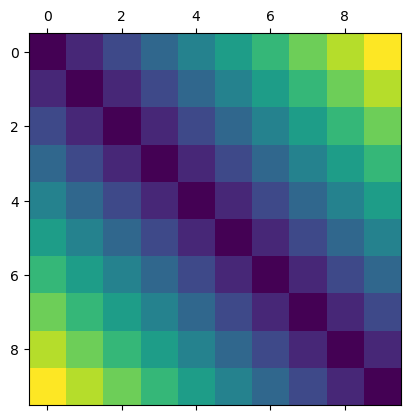

PyObject <matplotlib.image.AxesImage object at 0x000000002D560208>

In [20]:
# Let us display 
using PyPlot
A = zeros(length(y), length(y))
for i = 1:length(shot)
    A[shot[i], geop[i]-length(y)] = t[i]
end
matshow(A)

In [32]:
fop.createJacobian(slowness)
J = fop.jacobian()
J.save("jacobian.ijv")

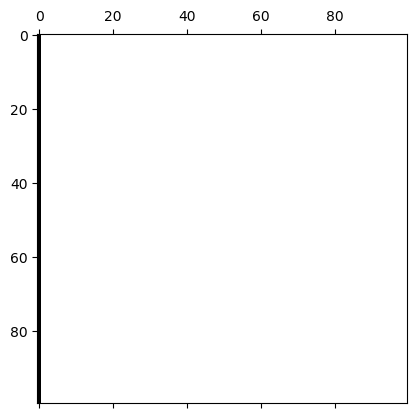

PyObject <matplotlib.image.AxesImage object at 0x0000000060714608>

In [34]:
A = zeros(J.nRows(), J.nCols())
for i = 1:J.nCols()
    A[:, i] = np.array(J.col(i-1))
end
spy(A)

In [46]:
srt = pg.physics.TravelTimeManager()
t = srt.simulate()

PyCall.PyError: PyError ($(Expr(:escape, :(ccall(#= C:\Users\halbm\.julia\packages\PyCall\zqDXB\src\pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'TypeError'>
TypeError("simulate() missing 2 required positional arguments: 'mesh' and 'scheme'")


In [30]:
t

PyObject <pygimli.core._pygimli_.RVector object at 0x000000005966E260>

In [27]:
# Create a mesh with secondary nodes
mesh = grid.createMeshWithSecondaryNodes(5)
print(mesh.__str__())

Mesh: Nodes: 121 Cells: 100 Boundaries: 220 secNodes: 1100